La exploración está hecha basada en este tutorial
https://www.hackersrealm.net/post/titanic-dataset-analysis-using-python

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Índice
* [Carga de datos](#carga)
* [Análisis exploratorio de datos](#exploración)
    * [Datos categóricos](#datoscategoricos)
    * [Datos numéricos](#datosnumericos)
    * [Combinaciones de datos](#combinaciones)
    * [Matriz de correlación](#procesamiento)

# Carga de datos <a class="anchor" id="carga"></a>

In [2]:
train = pd.read_csv("./titanic_data/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Se observa que hay características (features) 

Categóricas:

    * Survived: 0 o 1   
    * Pclass:  1, 2 o 3
    * Sex: male o female
    * Embarked: S (Southampton), C (Cherbourg) o Q (Queenstown)

Numéricas:

    * PassengerId
    * Age
    * SibSp (número de hermanos o esposo de una persona a bordo) - en el tutorial figuraban como categóricas
    * Parch (número de padres o hijos a bordo) - en el tutorial figuraban como categóricas
    * Fare (tarifa)

Otras:

    * Name
    * Ticket
    * Cabina

In [3]:
test = pd.read_csv("./titanic_data/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# información estadística con seaborn
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Info del pandas
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Análisis exploratorio de datos<a class="anchor" id="exploración"></a>

## Datos categóricos<a class="anchor" id="datoscategoricos"></a>

En la tabla de entrenamiento, ¿cuántos sobrevivieron?

<AxesSubplot: ylabel='count'>

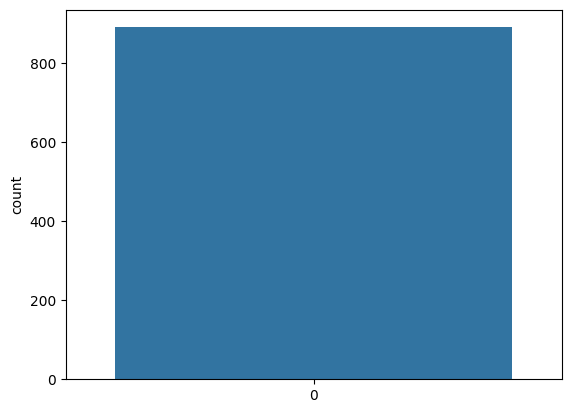

In [6]:
# En el tutorial dice 
sns.countplot(train['Survived'])
# pero arma una sola columna sin saber que poner en el eje x

<AxesSubplot: xlabel='Survived', ylabel='count'>

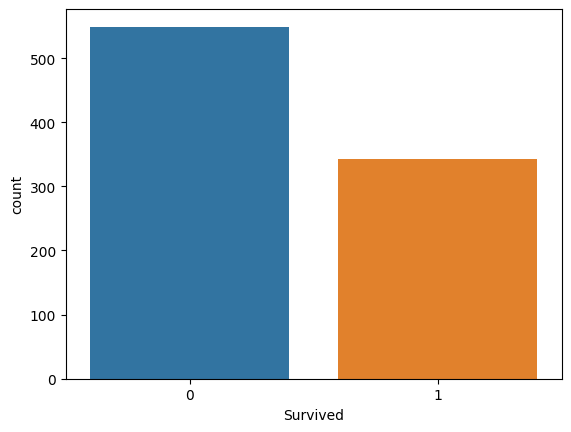

In [7]:
# En cambio, ahora le digo qué poner y va bene
sns.countplot(train,x = train["Survived"])

¿Cuántos había de primera, segunda y tercera clase?

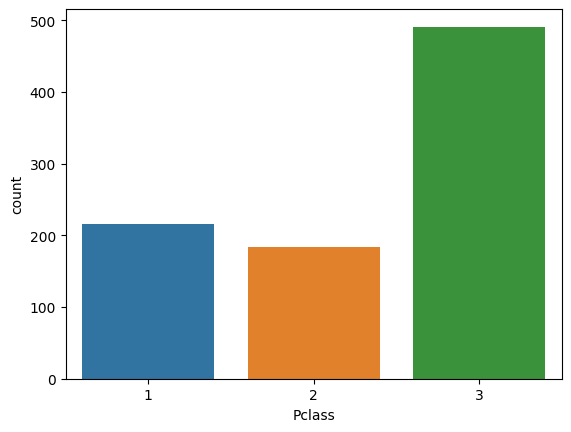

In [8]:
sns.countplot(train,x = train["Pclass"])
plt.show() # para que no muestre el <AxesSubplot...

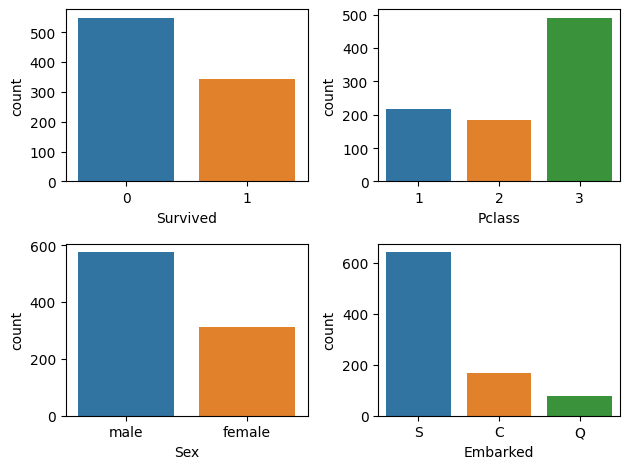

In [9]:
# Como hay cuatro conjuntos de datos categóricos, los dibujo todos juntos
fig, axes = plt.subplots(2, 2)
sns.countplot(train,x = train["Survived"],ax=axes[0,0])
sns.countplot(train,x = train["Pclass"],ax=axes[0,1])
sns.countplot(train,x = train["Sex"],ax=axes[1,0])
sns.countplot(train,x = train["Embarked"],ax=axes[1,1])
fig.tight_layout() # Para que no se superpongan los gráficos
plt.show()

## Datos numéricos <a class="anchor" id="datosnumericos"></a>

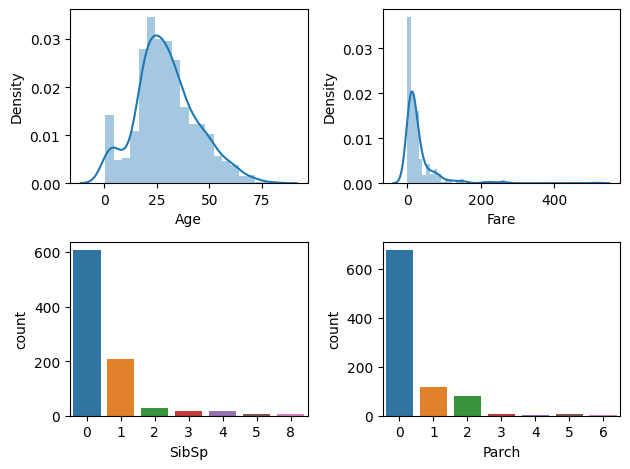

In [10]:
# Como hay cuatro conjuntos de datos numéricos (excepto el de Id), los dibujo todos juntos
fig, axes = plt.subplots(2, 2)
sns.distplot(train["Age"],ax=axes[0,0])
sns.distplot(train["Fare"],ax=axes[0,1])
sns.countplot(train,x = train["SibSp"],ax=axes[1,0])
sns.countplot(train,x = train["Parch"],ax=axes[1,1])
fig.tight_layout() # Para que no se superpongan los gráficos
plt.show()

## Combinaciones de datos <a class="anchor" id="combinaciones"></a>

¿Cuál es el precio promedio por cada clase?

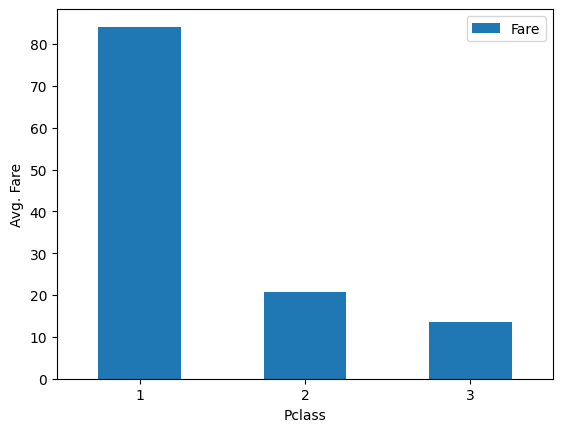

In [11]:
class_fare = train.pivot_table(index='Pclass', values='Fare') # por default tiene aggfunc='mean'
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Avg. Fare')
plt.xticks(rotation=0)
plt.show()

La misma tabla pero con la sumatoria

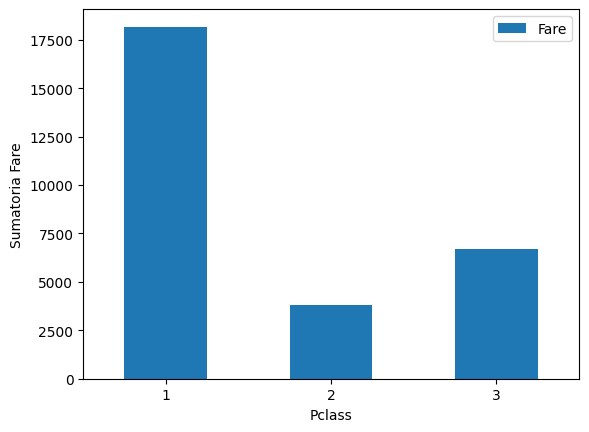

In [12]:
class_fare = train.pivot_table(index='Pclass', values='Fare', aggfunc=np.sum)
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Sumatoria Fare')
plt.xticks(rotation=0)
plt.show()

Estas dos combinaciones no nos dijeron nada acerca de si sobrevivieron o no...

Ahora sí. De cada clase ¿cuántos sobrevivieron?

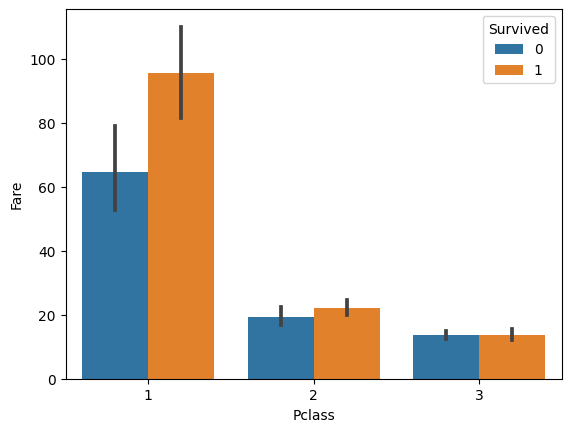

In [13]:
sns.barplot(data=train, x='Pclass', y='Fare', hue='Survived')
plt.show()

Se observa una tendencia a que de cada clase sobrevivan los que más tarifa pagaron.

Proporciones de sobrevivientes. El siguiente gráfico muestra el promedio, que como está entre 0 y 1, directamente da la proporción de sobrevivientes por clase. Más del 60% de primera, casi 50% de segunda y aprox 25% de tercera. 

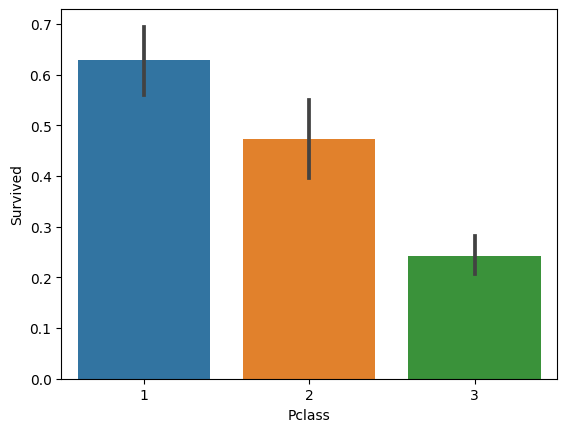

In [14]:
sns.barplot(data=train, x='Pclass', y='Survived')
plt.show()

Ahora busco la misma información, pero a mano

In [15]:
clase=train["Pclass"]
sobre=train["Survived"]

In [16]:
c1=clase==1
c2=clase==2
c3=clase==3
sobre_relacion=np.array([np.sum(sobre[c1])/np.sum(c1),np.sum(sobre[c2])/np.sum(c2),np.sum(sobre[c3])/np.sum(c3)])

In [17]:
print(f"Relación de sobrevivientes de primera: {sobre_relacion[0]:.3f}")
print(f"Relación de sobrevivientes de segunda: {sobre_relacion[1]:.3f}")
print(f"Relación de sobrevivientes de tercera: {sobre_relacion[2]:.3f}")

Relación de sobrevivientes de primera: 0.630
Relación de sobrevivientes de segunda: 0.473
Relación de sobrevivientes de tercera: 0.242


Un gráfico que muestre la relación de sobrevivientes en el eje y, con el sexo en el eje x

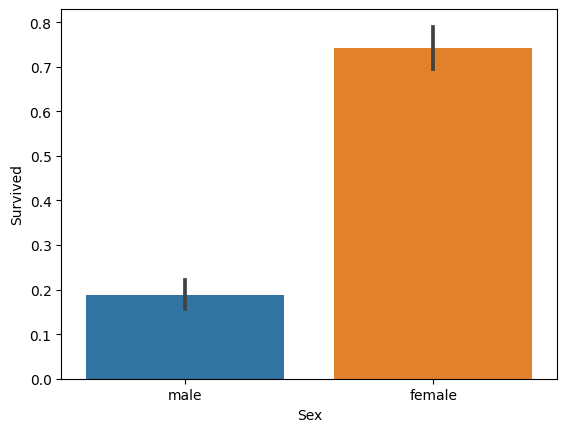

In [18]:
sns.barplot(x=train.Sex,y=train.Survived)
plt.show()

In [19]:
# Separar hombres y mujeres:
hombres = train[train.Sex == 'male']
mujeres = train[train.Sex == 'female']

# Hombres y mujeres salvados:
hombres_salvados=hombres[hombres.Survived==1]
mujeres_salvadas=mujeres[mujeres.Survived==1]

print(f"Relación de sobrevivientes de primera: {hombres_salvados.shape[0]/hombres.shape[0]:.3f}")
print(f"Relación de sobrevivientes de segunda: {mujeres_salvadas.shape[0]/mujeres.shape[0]:.3f}")

Relación de sobrevivientes de primera: 0.189
Relación de sobrevivientes de segunda: 0.742


Un gráfico que muestre la relación de sobrevivientes en el eje y, con el sexo en el eje x y dividido por clase (en el hue) 

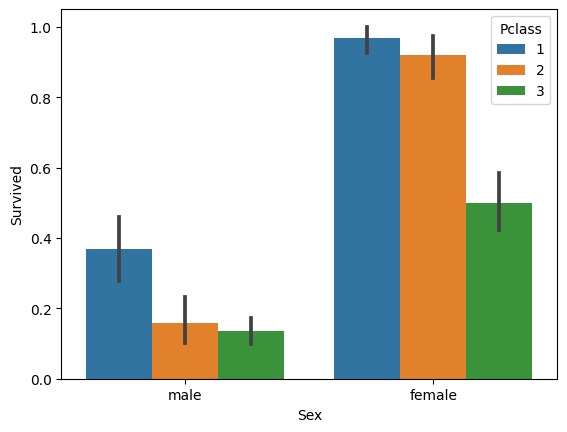

In [20]:
sns.barplot(x=train.Sex,y=train.Survived,hue=train.Pclass)
plt.show()

In [21]:
print(f"Relación de sobrevivientes de hombres de primera: {hombres[(hombres.Survived==1) & (hombres.Pclass==1)].shape[0]/hombres[(hombres.Pclass==1)].shape[0]:.3f}")
print(f"Relación de sobrevivientes de hombres de segunda: {hombres[(hombres.Survived==1) & (hombres.Pclass==2)].shape[0]/hombres[(hombres.Pclass==2)].shape[0]:.3f}")
print(f"Relación de sobrevivientes de hombres de tercera: {hombres[(hombres.Survived==1) & (hombres.Pclass==3)].shape[0]/hombres[(hombres.Pclass==3)].shape[0]:.3f}")
print(f"Relación de sobrevivientes de mujeres de primera: {mujeres[(mujeres.Survived==1) & (mujeres.Pclass==1)].shape[0]/mujeres[(mujeres.Pclass==1)].shape[0]:.3f}")
print(f"Relación de sobrevivientes de mujeres de segunda: {mujeres[(mujeres.Survived==1) & (mujeres.Pclass==2)].shape[0]/mujeres[(mujeres.Pclass==2)].shape[0]:.3f}")
print(f"Relación de sobrevivientes de mujeres de tercera: {mujeres[(mujeres.Survived==1) & (mujeres.Pclass==3)].shape[0]/mujeres[(mujeres.Pclass==3)].shape[0]:.3f}")

Relación de sobrevivientes de hombres de primera: 0.369
Relación de sobrevivientes de hombres de segunda: 0.157
Relación de sobrevivientes de hombres de tercera: 0.135
Relación de sobrevivientes de mujeres de primera: 0.968
Relación de sobrevivientes de mujeres de segunda: 0.921
Relación de sobrevivientes de mujeres de tercera: 0.500


Este resultado ya parece más que suficiente para entrenar a la red, pero podríamos también cruzar la información con la edad, los hijos y hermanos, y el precio de la tarifa.

### Análisis de precios vs clase

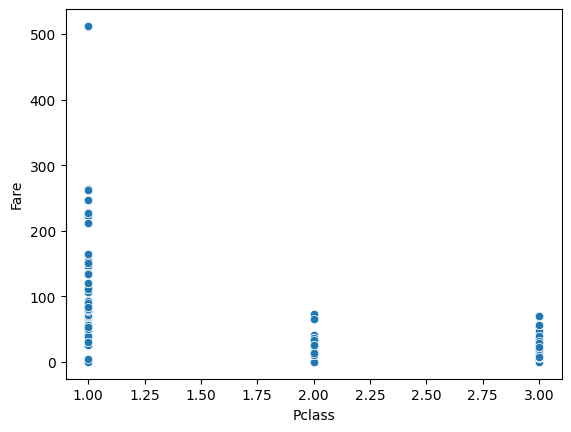

In [22]:
sns.scatterplot(data=train, x='Pclass', y='Fare')
plt.show()

Los precios de segunda y de tercera se parece. ¿A ver las medias?

In [23]:
print(f"Promedio de precios de primera: {np.mean(train[(train.Pclass==1)].Fare):.3f}")
print(f"Promedio de precios de segunda: {np.mean(train[(train.Pclass==2)].Fare):.3f}")
print(f"Promedio de precios de tercera: {np.mean(train[(train.Pclass==3)].Fare):.3f}")

Promedio de precios de primera: 84.155
Promedio de precios de segunda: 20.662
Promedio de precios de tercera: 13.676


## Matriz de correlación <a class="anchor" id="procesamiento"></a>

Quiero lograr esta matriz: 

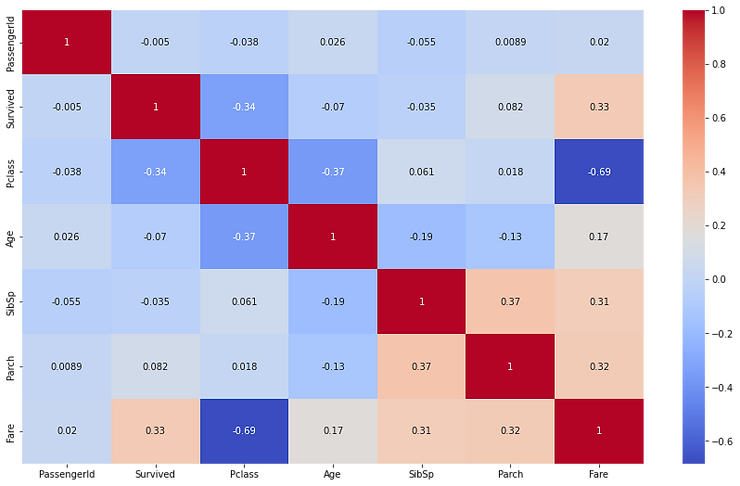

pero para eso es necesario limpiar un poco los datos

In [24]:
# Cantidad de campos que no tienen información
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Hay 687 pasajeros que no tienen información sobre la cabina. Por lo tanto descartamos esta columna

In [25]:
train = train.drop(columns=['Cabin'], axis=1)

In [26]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

Falta la edad de varios pasajeros y de los puertos de embarque. Para el embarque, como la cantidad es insignificante, por completitud vamos a remplazar esta información por la moda. Mostrar los elementos a los que le falta el embarked:

In [27]:
train.loc[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


Para calcular la moda:

In [28]:
train.Embarked.mode()

0    S
Name: Embarked, dtype: object

Pero como el resultado es un objeto, la 'S' la obtengo si me quedo con el elemento 0

In [29]:
train.Embarked.mode()[0]

'S'

Luego, para rellenar las columnas con ese dato:

In [30]:
train.Embarked[train.Embarked.isnull()]=train.Embarked.mode()[0]
train.loc[[61,829]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,S


Ahora solo queda ver qué hacemos con las edades.

In [31]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

Relación de datos que les falta la edad:

In [32]:
train.Age.isnull().sum()/train.shape[0]

0.19865319865319866

Casi el 20%. Entonces acá el tutorial sugiere remplazar esto por el promedio. Yo diría entrenar la red sin tener en cuenta la edad como característica. Pero mejor, primero veamos las dos matrices de correlación.

In [33]:
train.Age.isna()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

El promedio de la edad se calcula con:

In [34]:
train.Age.mean()

29.69911764705882

Que está tomado de los datos que no son nulos. Para corroborar esto, lo calculo a manopla:

In [35]:
train.Age.sum()/train[train.Age.notna()].shape[0] # notna() es la inversa de isna()

29.69911764705882

In [36]:
train_age=train.copy() # Si no se usa el copy(), cuando cambio train_age también se cambia train
train_age.Age[train_age.Age.isnull()]=train.Age.mean()

Ahora sí, las matrices de correlación:

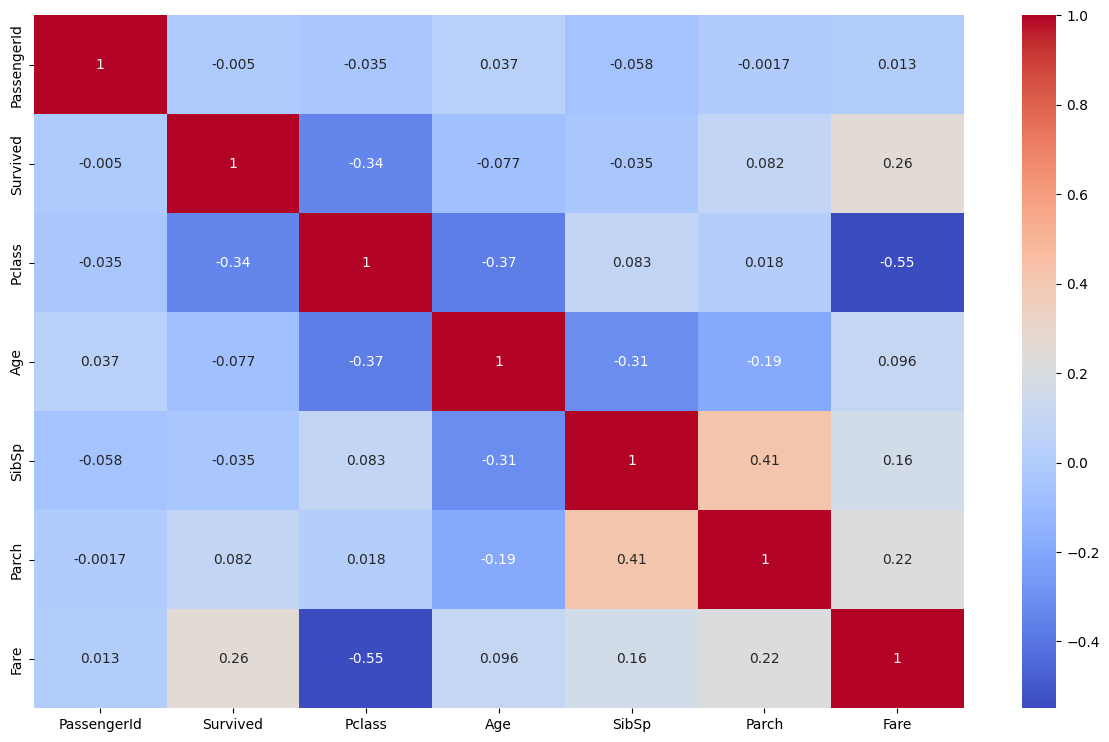

In [37]:
corr = train.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

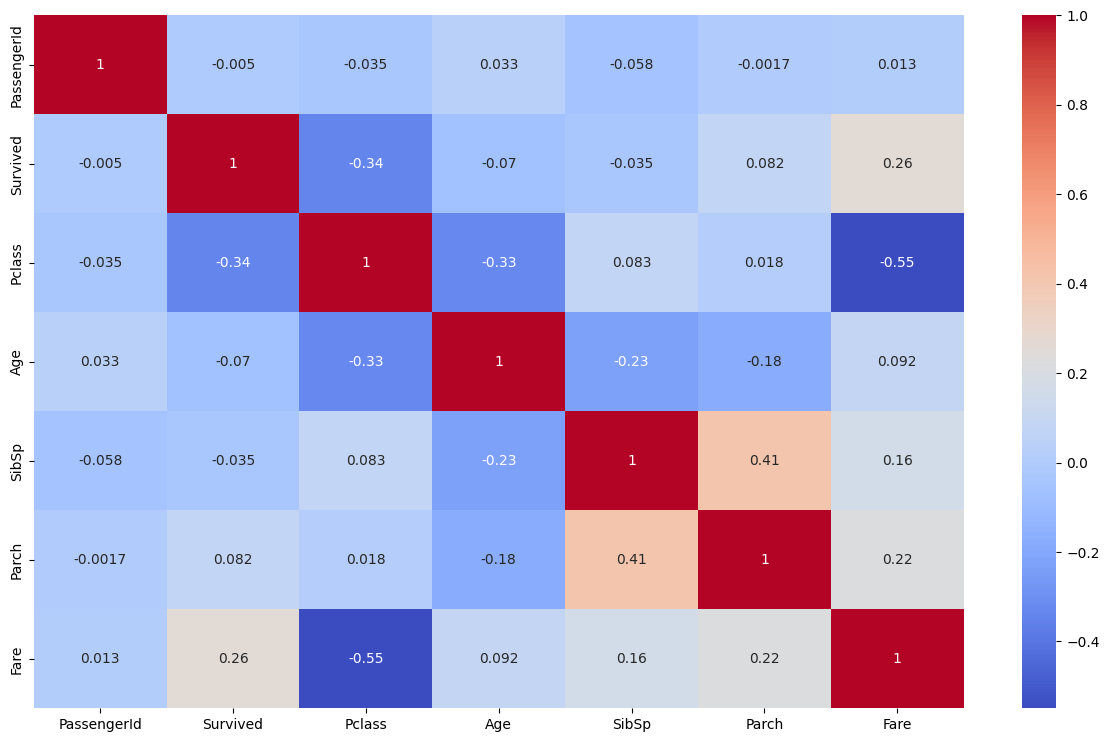

In [38]:
corr = train_age.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

Se observa que es poca la diferencia en la correlación de las matrices habiendo completado los datos de la edad y sin haberlos completado (fila survived columna age, o viceversa). Por lo tanto, me quedo con el set de datos de la edad completada.

Por otro lado, acá faltan las características Name, Sex, Ticket y Embarked. Esto es porque son objetos.

In [39]:
train_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


El nombre y el ticket podemos descartarlos, pero sabemos que Sex tiene alta relación y no sabemos sobre embarked. Entonces hacemos un nuevo dataframe para el cual quitamos las columas Name y Ticket, y le daremos una etiqueta numérica a Sex y a Embarked. De paso, también saco el Id pq no aporta nada.

In [40]:
train_code=train_age.copy()
train_code=train_code.drop(columns=['PassengerId', 'Name', 'Ticket'], axis=1)
train_code.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Codifico la columna Sex, agregando una SexN y la Embarked, agregando EmbarkedN

In [41]:
train_code['SexN']=pd.Categorical(train_code.Sex).codes
train_code['EmbarkedN']=pd.Categorical(train_code.Embarked).codes
train_code.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,SexN,EmbarkedN
0,0,3,male,22.0,1,0,7.2500,S,1,2
1,1,1,female,38.0,1,0,71.2833,C,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,2
3,1,1,female,35.0,1,0,53.1000,S,0,2
4,0,3,male,35.0,0,0,8.0500,S,1,2


Para limpiar, quito las comulmnas Sex y Embarked

In [42]:
train_code=train_code.drop(columns=['Sex', 'Embarked'], axis=1)
train_code.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,SexN,EmbarkedN
0,0,3,22.0,1,0,7.2500,1,2
1,1,1,38.0,1,0,71.2833,0,0
2,1,3,26.0,0,0,7.9250,0,2
3,1,1,35.0,1,0,53.1000,0,2
4,0,3,35.0,0,0,8.0500,1,2


Ahora sí, la matriz de correlación definitiva y final

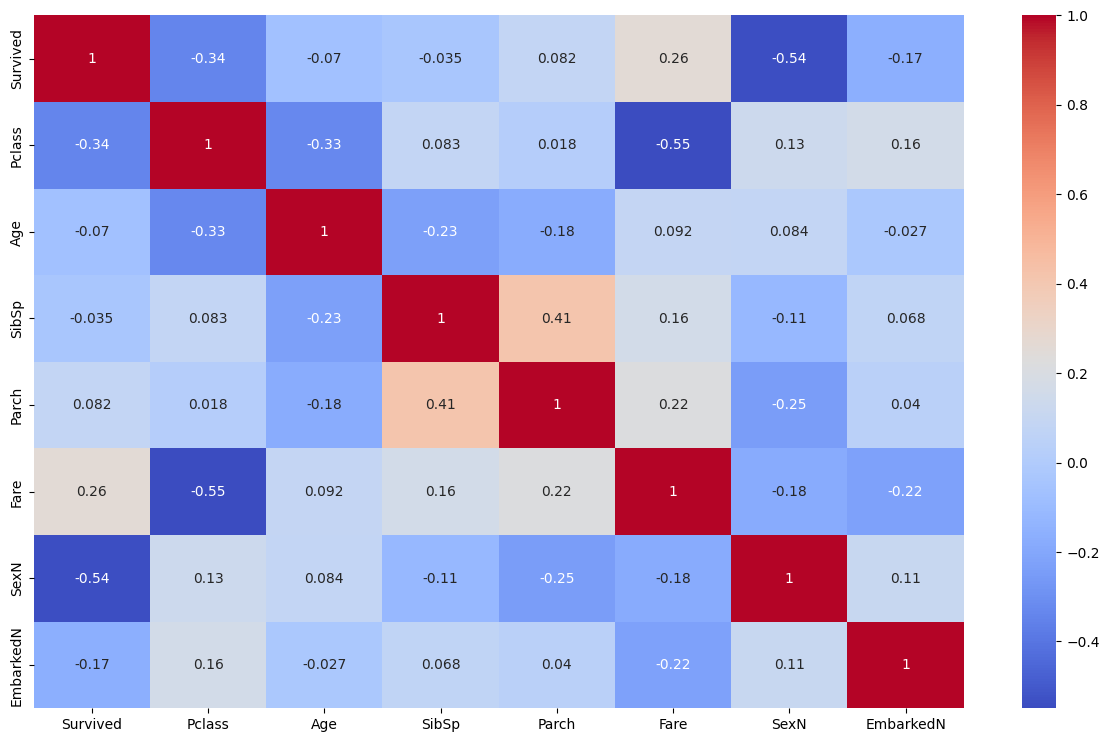

In [43]:
corr = train_code.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()